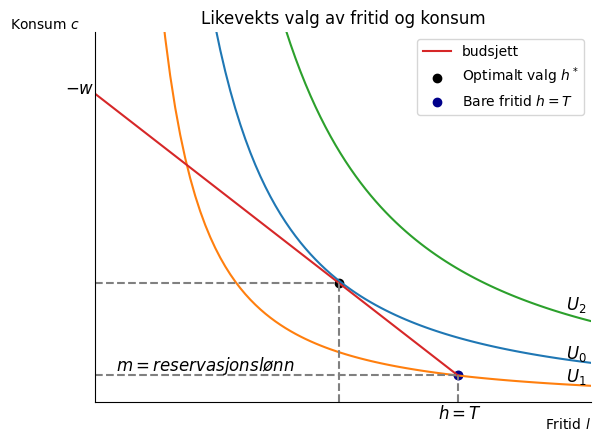

In [135]:
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp



c, l, a, b, U_0 =sp.symbols("c l a b U_0", real=True, positive=True)
U=c**a*l**b
# Løser for x_2
x_2_ind_sol=sp.solve(U-U_0,l)[0]

indiff_x_2=sp.lambdify( (U_0,a,b,c), x_2_ind_sol)



def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2


p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*c+p_2*l

# Beregne MSB

msb = sp.diff(U, c)/sp.diff(U,l)
x_2_rel=sp.solve(msb-p_1/p_2,l)[0]
budsj=bud.subs(l,x_2_rel)
x_1_eq= sp.solve(budsj-m,c)[0]

x_2_eq= x_2_rel.subs(c,x_1_eq)

U_max=U.subs([(c,x_1_eq),(l,x_2_eq)])

nytte = U_max.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])
x_1_num = x_1_eq.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])
x_2_num = x_2_eq.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])


intersection_eq = indiff_x_2(8, .4, .25, c) - budsjett(2000, 25, 40, c)

c_intersection = sp.solve(intersection_eq, c)

l_value_at_intersection_1 = indiff_x_2(8, .4, .25, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(8, .4, .25, c_intersection[1])

c_intersection, (l_value_at_intersection_1, l_value_at_intersection_2)


x=np.linspace(0.001,100, 100)


fig, ax = plt.subplots()

ax.set_ylabel('Konsum $c$', loc='top', rotation=0)
ax.set_xlabel('Fritid $l$', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,60))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')   

         
#no numbers on axis
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
#no ticks on x or y axis
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')



# plott funksjonen
ax.plot(x, indiff_x_2(10,.4,.25,x))
ax.plot(x, indiff_x_2(8,.4,.25,x))
ax.plot(x, indiff_x_2(12,.4,.25,x))

#i add annotations to the graph above each line where they end to the right
ax.text(95, 7, '$U_0$', fontsize=12)
ax.text(95, 3.2, '$U_1$', fontsize=12)
ax.text(95, 15, '$U_2$', fontsize=12)



x_budget = np.linspace(0, float(c_intersection[1]), 500)
ax.plot(x_budget, budsjett(2000, 25, 40, x_budget), label='budsjett')

ax.vlines(c_intersection[1],0,l_value_at_intersection_2, color='grey',ls='dashed') 




ax.scatter(c_intersection[1], l_value_at_intersection_2, color="grey")  
#under the scatter i write tex
ax.text(c_intersection[1]-4, l_value_at_intersection_2-7, '$h = T$', fontsize=12)
ax.hlines(l_value_at_intersection_2,0,c_intersection[1], color='grey',ls='dashed') 
ax.text(l_value_at_intersection_2, 5, '$m = reservasjonslønn$', fontsize=12)


#Budget line
#ax.plot(x, budsjett(2000, 25, 40, x), label = 'budsjett')

#on the left of the where the budget line crosses the y-axis i write w and i add a tick for it on the y-axis
ax.text(-6, budsjett(2000, 25, 40, 0), '$-w$', fontsize=12)




ax.vlines(x_1_num,0,x_2_num, color='grey',ls='dashed')
ax.hlines(x_2_num,0,x_1_num, color='grey',ls='dashed')

ax.scatter(x_1_num, x_2_num, color="black", label="Optimalt valg $h^*$")

ax.scatter(c_intersection[1], l_value_at_intersection_2, color="darkblue", label="Bare fritid $h=T$")
# tittel
ax.set_title('Likevekts valg av fritid og konsum')


#vis navnene:
ax.legend()


#plt.show()

 $a+b\leq1$ 

In [64]:
# Set the U_1 curve equal to the budget line and solve for c

U_1_value = 8  # Given
intersection_eq = indiff_x_2(U_1_value, .4, .25, c) - budsjett(2000, 25, 40, c)
c_intersection = sp.solve(intersection_eq, c)

# Use the solved c value to get the l value
l_intersection = indiff_x_2(U_1_value, .4, .25, c_intersection[0])

c_intersection, l_intersection

# Solving for the intersection of U_1 and the budget line
intersection_solution = sp.solve(intersection_eq, c)

# Evaluate the l value at the intersection
l_value_at_intersection = indiff_x_2(U_1_value, .4, .25, intersection_solution[0])


# Return the value where the budget line crosses U_1
x_2_cross_U1 = indiff_x_2(8, .4, .25, x_1_num)
x_2_cross_U1
# Evaluate the l values at both intersection points
l_value_at_intersection_1 = indiff_x_2(U_1_value, .4, .25, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(U_1_value, .4, .25, c_intersection[1])

l_value_at_intersection_1, l_value_at_intersection_2

intersection_solution[0], l_value_at_intersection

(18.5042647074835, 38.4348345578228)

In [63]:
# Evaluate the l values at both intersection points
l_value_at_intersection_1 = indiff_x_2(U_1_value, .4, .25, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(U_1_value, .4, .25, c_intersection[1])

l_value_at_intersection_1, l_value_at_intersection_2


(38.4348345578228, 4.25866914959636)

In [66]:
U_1_value = 8  # Given

# Define the difference between U_1 and the budget line
intersection_eq = indiff_x_2(U_1_value, .4, .25, c) - budsjett(2000, 25, 40, c)

# Solve for the c values where the budget line intersects U_1
c_intersection = sp.solve(intersection_eq, c)

# Compute l values for both c intersection points
l_value_at_intersection_1 = indiff_x_2(U_1_value, .4, .25, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(U_1_value, .4, .25, c_intersection[1])

c_intersection, (l_value_at_intersection_1, l_value_at_intersection_2)


([18.5042647074835, 73.1861293606458], (38.4348345578228, 4.25866914959636))

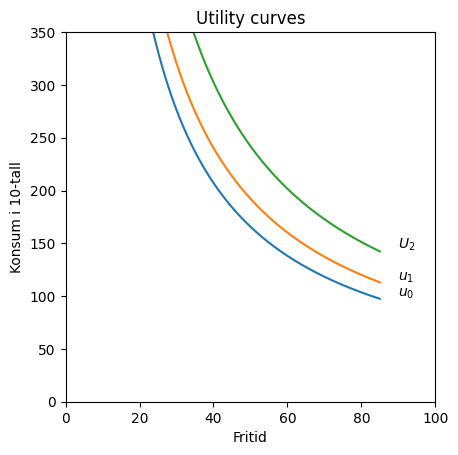

In [63]:
import numpy as np
from matplotlib import pyplot as plt

l_1 = np.linspace(0.001, 85, 1000)  

I_0 = (91.03061**2) / l_1
I_1 = (98.03061**2) / l_1
I_2 = (110**2) / l_1



# Figure 1 - Utility curves and their labels
fig, ax = plt.subplots()

ax.plot(l_1, I_0, label="$u_0$")
ax.plot(l_1, I_1, label="$u_1$")
ax.plot(l_1, I_2, label="$u_2$")


ax.text(90, 100, s = "$u_0$")
ax.text(90, 115, s = "$u_1$")
ax.text(90, 145, s = "$U_2$")





ax.set_xlim([0, 100])
ax.set_ylim([0, 350])
ax.set_aspect(100 / 350)
ax.set_title("Utility curves")
ax.set_xlabel("Fritid")
ax.set_ylabel("Konsum i 10-tall")

plt.show()


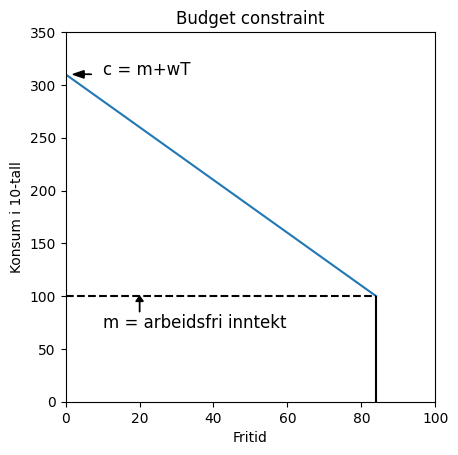

In [51]:

def budget_constraint(l_1):
    return 310 - 2.5 * l_1

fig2, ax2 = plt.subplots()

ax2.plot([0, 84], [budget_constraint(0), budget_constraint(84)], label='Budget constraint')
ax2.annotate("c = m+wT", (10, budget_constraint(0)), fontsize=12)
ax2.vlines(84, 0, 100, colors='black', linestyles='solid')
ax2.hlines(100, 0, 84, colors='black', linestyles='dashed')
ax2.annotate("m = arbeidsfri inntekt", (10, 70), fontsize=12)
ax2.arrow(20, 85, 0, 10, head_width=2, head_length=5, fc='black', ec='black')

ax2.set_xlim([0, 100])
ax2.set_ylim([0, 350])
ax2.set_aspect(100 / 350)
ax2.set_title("Budsjettbetingelse")
ax2.set_xlabel("Fritid")
ax2.set_ylabel("Konsum i 10-tall")
ax2.arrow(7, budget_constraint(0), -2, 0, head_width=7, head_length=3, fc='black', ec='black')

plt.show()

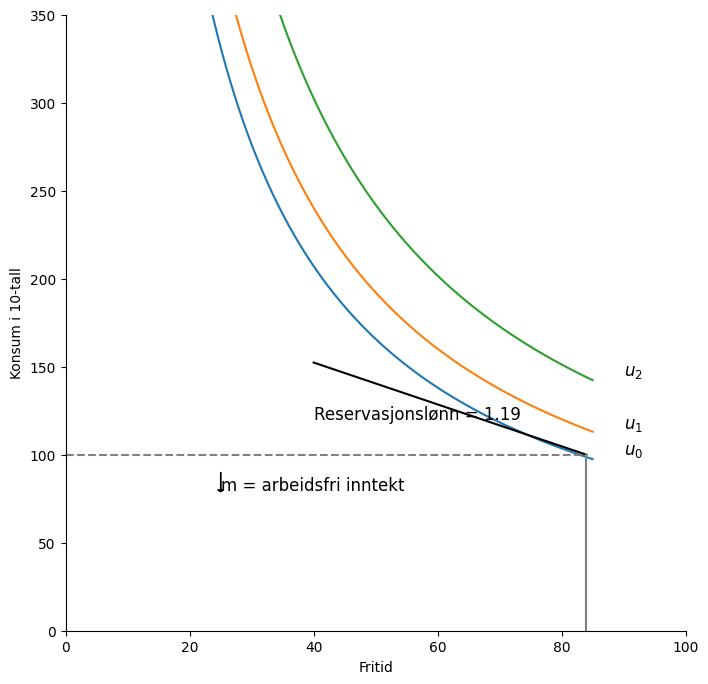

In [66]:
def wr(l_1):
    return 200 - 1.19047619 * l_1

l_wr = np.linspace(40, 84, 1000)


fig, ax3 = plt.subplots(figsize=(8,8))

ax3.set_xlim(0, 100)
ax3.set_ylim(0, 350)
ax3.set_xlabel('Fritid')
ax3.set_ylabel('Konsum i 10-tall')
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')


ax3.plot(l_1, I_0, label="I_0")
ax3.plot(l_1, I_1, label="I_1")
ax3.plot(l_1, I_2, label="I_2")



ax3.plot(l_wr, wr(l_wr), 'k-', label='wr')



ax3.annotate(r'$u_0$', (90, 100), fontsize=12)
ax3.annotate(r'$u_1$', (90, 115), fontsize=12)
ax3.annotate(r'$u_2$', (90, 145), fontsize=12)
ax3.axvline(x=84, ymin=0, ymax=100/350, color='grey')
ax3.axhline(y=100, xmin=0, xmax=84/100, linestyle='--', color='grey')
ax3.annotate('Reservasjonslønn = 1.19', (40, 120), fontsize=12)
ax3.annotate('m = arbeidsfri inntekt', (25, 80), fontsize=12)
ax3.arrow(25, 90, 0, -10, head_width=1, head_length=1, fc='k', ec='k')

plt.show()

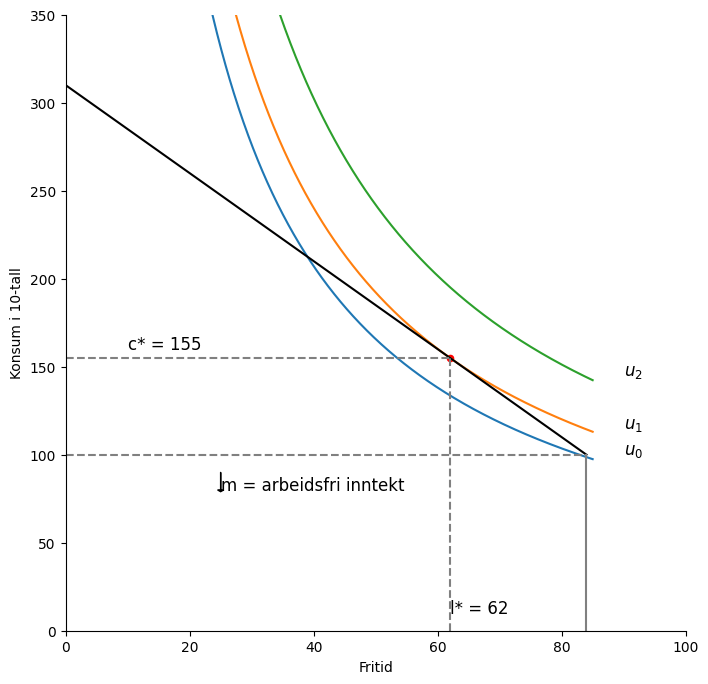

In [56]:
# Setting up the figure and axes
fig, ax4 = plt.subplots(figsize=(8,8))


ax4.set_xlim(0, 100)
ax4.set_ylim(0, 350)
ax4.set_xlabel('Fritid')
ax4.set_ylabel('Konsum i 10-tall')
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')


ax4.plot(l_1, I_0, label="I_0")
ax4.plot(l_1, I_1, label="I_1")
ax4.plot(l_1, I_2, label="I_2")

# 3. Plotting the budget constraint
def budget_constraint(l_1):
    return 310 - 2.5 * l_1

l_budget = np.linspace(0, 84, 1000)
ax4.plot(l_budget, budget_constraint(l_budget), 'k-', label='Budget Constraint')

# 4. Adding annotations and styling
ax4.annotate(r'$u_0$', (90, 100), fontsize=12)
ax4.annotate(r'$u_1$', (90, 115), fontsize=12)
ax4.annotate(r'$u_2$', (90, 145), fontsize=12)

ax4.axvline(x=62, ymin=0, ymax=155/350, linestyle='--', color='grey')
ax4.axhline(y=155, xmin=0, xmax=62/100, linestyle='--', color='grey')
ax4.arrow(25, 90, 0, -10, head_width=1, head_length=1, fc='k', ec='k')
ax4.scatter(62, 155, color='red', s=20)
ax4.axvline(x=84, ymin=0, ymax=100/350, color='grey')
ax4.axhline(y=100, xmin=0, xmax=84/100, linestyle='--', color='grey')
ax4.annotate('m = arbeidsfri inntekt', (25, 80), fontsize=12)
ax4.annotate('l* = 62', (62, 10), fontsize=12)
ax4.annotate('c* = 155', (10, 160), fontsize=12)

plt.show()

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp



c, l, a, b, U_0 =sp.symbols("c l a b U_0", real=True, positive=True)
U=c**a*l**b
# Løser for x_2
x_2_ind_sol=sp.solve(U-U_0,l)[0]

indiff_x_2=sp.lambdify( (U_0,a,b,c), x_2_ind_sol)



def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2


p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*c+p_2*l

# Beregne MSB

msb = sp.diff(U, c)/sp.diff(U,l)
x_2_rel=sp.solve(msb-p_1/p_2,l)[0]
budsj=bud.subs(l,x_2_rel)
x_1_eq= sp.solve(budsj-m,c)[0]

x_2_eq= x_2_rel.subs(c,x_1_eq)

U_max=U.subs([(c,x_1_eq),(l,x_2_eq)])

nytte = U_max.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])
x_1_num = x_1_eq.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])
x_2_num = x_2_eq.subs([(a,.4),(b,.25),(m,2000),(p_1,25),(p_2,40)])


intersection_eq = indiff_x_2(8, .4, .25, c) - budsjett(2000, 25, 40, c)

c_intersection = sp.solve(intersection_eq, c)

l_value_at_intersection_1 = indiff_x_2(8, .4, .25, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(8, .4, .25, c_intersection[1])

c_intersection, (l_value_at_intersection_1, l_value_at_intersection_2)


x=np.linspace(0.001,100, 100)


fig, ax = plt.subplots()

ax.set_ylabel('Konsum $c$', loc='top', rotation=0)
ax.set_xlabel('Fritid $l$', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,60))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')   

         
#no numbers on axis
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
#no ticks on x or y axis
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')



# plott funksjonen
ax.plot(x, indiff_x_2(10,.4,.25,x))
ax.plot(x, indiff_x_2(8,.4,.25,x))
ax.plot(x, indiff_x_2(12,.4,.25,x))

#i add annotations to the graph above each line where they end to the right
ax.text(95, 7, '$U_0$', fontsize=12)
ax.text(95, 3.2, '$U_1$', fontsize=12)
ax.text(95, 15, '$U_2$', fontsize=12)



x_budget = np.linspace(0, float(c_intersection[1]), 500)
ax.plot(x_budget, budsjett(2000, 25, 40, x_budget), label='budsjett')

ax.vlines(c_intersection[1],0,l_value_at_intersection_2, color='grey',ls='dashed') 




ax.scatter(c_intersection[1], l_value_at_intersection_2, color="grey")  
#under the scatter i write tex
ax.text(c_intersection[1]-4, l_value_at_intersection_2-7, '$h = T$', fontsize=12)
ax.hlines(l_value_at_intersection_2,0,c_intersection[1], color='grey',ls='dashed') 
ax.text(l_value_at_intersection_2, 5, '$m = reservasjonslønn$', fontsize=12)


#Budget line
#ax.plot(x, budsjett(2000, 25, 40, x), label = 'budsjett')

#on the left of the where the budget line crosses the y-axis i write w and i add a tick for it on the y-axis
ax.text(-6, budsjett(2000, 25, 40, 0), '$-w$', fontsize=12)




ax.vlines(x_1_num,0,x_2_num, color='grey',ls='dashed')
ax.hlines(x_2_num,0,x_1_num, color='grey',ls='dashed')

ax.scatter(x_1_num, x_2_num, color="black", label="Optimalt valg $h^*$")

ax.scatter(c_intersection[1], l_value_at_intersection_2, color="darkblue", label="Bare fritid $h=T$")
# tittel
ax.set_title('Likevekts valg av fritid og konsum')


#vis navnene:
ax.legend()


#plt.show()

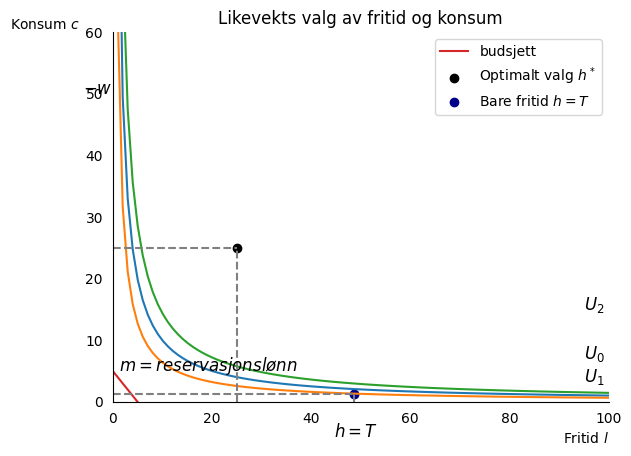

In [153]:
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

#Skifter alpha og beta til 0.5. som vist i eksempel

c, l, a, b, U_0 =sp.symbols("c l a b U_0", real=True, positive=True)
U=c**a*l**b
# Løser for x_2
x_2_ind_sol=sp.solve(U-U_0,l)[0]

indiff_x_2=sp.lambdify( (U_0,a,b,c), x_2_ind_sol)



def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2


p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*c+p_2*l

# Beregne MSB

msb = sp.diff(U, c)/sp.diff(U,l)
x_2_rel=sp.solve(msb-p_1/p_2,l)[0]
budsj=bud.subs(l,x_2_rel)
x_1_eq= sp.solve(budsj-m,c)[0]

x_2_eq= x_2_rel.subs(c,x_1_eq)

U_max=U.subs([(c,x_1_eq),(l,x_2_eq)])

nytte = U_max.subs([(a,.5),(b,.5),(m,500),(p_1,10),(p_2,10)])
x_1_num = x_1_eq.subs([(a,.5),(b,.5),(m,500),(p_1,10),(p_2,10)])
x_2_num = x_2_eq.subs([(a,.5),(b,.5),(m,500),(p_1,10),(p_2,10)])


intersection_eq = indiff_x_2(8, .5, .5, c) - budsjett(500, 10, 10, c)

c_intersection = sp.solve(intersection_eq, c)

l_value_at_intersection_1 = indiff_x_2(8, .5, .5, c_intersection[0])
l_value_at_intersection_2 = indiff_x_2(8, .5, .5, c_intersection[1])

c_intersection, (l_value_at_intersection_1, l_value_at_intersection_2)


x=np.linspace(0.001,100, 100)


fig, ax = plt.subplots()

ax.set_ylabel('Konsum $c$', loc='top', rotation=0)
ax.set_xlabel('Fritid $l$', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,60))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')   

         
#no numbers on axis
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.yaxis.set_major_formatter(plt.NullFormatter())
#no ticks on x or y axis
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')



# plott funksjonen
ax.plot(x, indiff_x_2(10,.5,.5,x))
ax.plot(x, indiff_x_2(8,.5,.5,x))
ax.plot(x, indiff_x_2(12,.5,.5,x))

#i add annotations to the graph above each line where they end to the right
ax.text(95, 7, '$U_0$', fontsize=12)
ax.text(95, 3.2, '$U_1$', fontsize=12)
ax.text(95, 15, '$U_2$', fontsize=12)



x_budget = np.linspace(0, float(c_intersection[1]), 500)
ax.plot(x_budget, budsjett(50, 10, 10, x_budget), label='budsjett')

ax.vlines(c_intersection[1],0,l_value_at_intersection_2, color='grey',ls='dashed') 




ax.scatter(c_intersection[1], l_value_at_intersection_2, color="grey")  
#under the scatter i write tex
ax.text(c_intersection[1]-4, l_value_at_intersection_2-7, '$h = T$', fontsize=12)
ax.hlines(l_value_at_intersection_2,0,c_intersection[1], color='grey',ls='dashed') 
ax.text(l_value_at_intersection_2, 5, '$m = reservasjonslønn$', fontsize=12)


#Budget line
#ax.plot(x, budsjett(2000, 25, 40, x), label = 'budsjett')

#on the left of the where the budget line crosses the y-axis i write w and i add a tick for it on the y-axis
ax.text(-6, budsjett(500, 10, 10, 0), '$-w$', fontsize=12)




ax.vlines(x_1_num,0,x_2_num, color='grey',ls='dashed')
ax.hlines(x_2_num,0,x_1_num, color='grey',ls='dashed')

ax.scatter(x_1_num, x_2_num, color="black", label="Optimalt valg $h^*$")

ax.scatter(c_intersection[1], l_value_at_intersection_2, color="darkblue", label="Bare fritid $h=T$")
# tittel
ax.set_title('Likevekts valg av fritid og konsum')


#vis navnene:
ax.legend()



plt.show()

In [148]:
intersection_eq 
c_intersection = sp.solve(intersection_eq, c)
intersection_eq

64.0/c**1.0 + 5*c/8 - 12.5

In [164]:
df

,Date,Company Name,Amount,Ticker,Open,High,Low,Close,Volume,Adj Close
0,2013-08-28,NHY NORSK HYDRO,−500,NHY.OL,24.889999,25.100000,24.760000,24.980000,2584345.0,16.160080
1,2013-08-28,SCANA SCANA,5400,SCANA.OL,9.272812,9.272812,8.379874,8.585937,124427.0,8.585937
2,2013-09-19,AVM Avocet Mining,−10000,AVM.OL,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-09-19,NOM NORDIC MINING,33000,NOM.OL,1.871531,1.918320,1.824743,1.824743,212177.0,1.824743
4,2013-10-03,SCANA SCANA,−8000,SCANA.OL,7.761687,7.761687,7.589968,7.589968,13131.0,7.589968
...,...,...,...,...,...,...,...,...,...,...
2541,2021-10-06,"NORDEA BANK ABP, FILIAL I NORGE ETN",−3855,"NORDEABANKABP,FILIALINORGEETN.OL",NaN,NaN,NaN,NaN,NaN,NaN
2542,2021-10-07,HEXAGON COMPOSITES ASA,1000,HEXAGON.OL,NaN,NaN,NaN,NaN,NaN,NaN
2543,2021-10-11,NORSKE SKOG ASA,1000,NORSKESKOGASA.OL,NaN,NaN,NaN,NaN,NaN,NaN
2544,2021-10-14,ELOPAK ASA,555,ELOPAKASA.OL,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
import yfinance as yf
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Daniel/Downloads/updated_odds_fantasy.csv')

ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}



# Convert the "Date" column to a date type
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Initialize lists to store fetched data
opens, highs, lows, closes, volumes, adj_closes = [], [], [], [], [], []

# Loop through each row in the DataFrame
for _, row in df.iterrows():
    ticker = row['Ticker']
    date = row['Date']
    
    # Fetch the stock data for the specific date
    try:
        stock_data = yf.download(ticker, start=date, end=date + pd.Timedelta(days=1))
        
        # Store the fetched data
        opens.append(stock_data.iloc[0]['Open'])
        highs.append(stock_data.iloc[0]['High'])
        lows.append(stock_data.iloc[0]['Low'])
        closes.append(stock_data.iloc[0]['Close'])
        volumes.append(stock_data.iloc[0]['Volume'])
        adj_closes.append(stock_data.iloc[0]['Adj Close'])
        
    except Exception as e:
        # If data is not available, append NA values
        opens.append(None)
        highs.append(None)
        lows.append(None)
        closes.append(None)
        volumes.append(None)
        adj_closes.append(None)

#nesten ferdig, legger alle aksjekurser tilbake inn i df
df['Open'] = opens
df['High'] = highs
df['Low'] = lows
df['Close'] = closes
df['Volume'] = volumes
df['Adj Close'] = adj_closes

df




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVM.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORDICMININGASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVM.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SOLON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIONORPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TOM_NO0005668905TOMRASYSTEMS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TOM_NO0005668905TOMRASYSTEMS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SEADRILL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEADRILL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEADRILL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEADRILL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDRO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ODFJELL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ODFJELL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['IMSK.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-05-30 00:00:00 -> 2016-05-31 00:00:00)')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORDIC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDRO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDRO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLPGBWLPG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARCUSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORDIC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHO.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHO.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECSIRECSILICON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEROY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEROY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADEVINTAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKAR(FDTTSGROUP)ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGAUTOMOTIVEASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGAUTOMOTIVEASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NEKKAR(FDTTSGROUP)ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRONTLINELTDNORGE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SAGAPUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISTINPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISTINPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISTINPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISTINPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGAPUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRONTLINELTDNORGE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGAPUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGAPUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SAGA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUSWILHELMSENLOGISTICSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRBPAKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HPUR.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1607554800, endDate = 1607641200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANOROENERGYASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGONPURUSAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LERØY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LERØY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 2 completed



2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NELASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASATEGNINGSRETTER.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASATEGNINGSRETTER.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASATEGNINGSRETTER.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASATEGNINGSRETTER.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-01 00:00:00 -> 2021-06-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-01 00:00:00 -> 2021-06-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-01 00:00:00 -> 2021-06-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-01 00:00:00 -> 2021-06-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-02 00:00:00 -> 2021-06-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-02 00:00:00 -> 2021-06-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-02 00:00:00 -> 2021-06-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-02 00:00:00 -> 2021-06-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-02 00:00:00 -> 2021-06-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-03 00:00:00 -> 2021-06-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-10 00:00:00 -> 2021-06-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-10 00:00:00 -> 2021-06-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-11 00:00:00 -> 2021-06-12 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-11 00:00:00 -> 2021-06-12 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARENDALS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-23 00:00:00 -> 2021-06-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-23 00:00:00 -> 2021-06-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-23 00:00:00 -> 2021-07-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-03 00:00:00 -> 2021-08-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-10 00:00:00 -> 2021-08-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-10 00:00:00 -> 2021-08-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTADOFFSHOREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELKEMASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-31 00:00:00 -> 2021-09-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-31 00:00:00 -> 2021-09-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-31 00:00:00 -> 2021-09-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-03 00:00:00 -> 2021-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-06 00:00:00 -> 2021-09-07 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-07 00:00:00 -> 2021-09-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-07 00:00:00 -> 2021-09-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KOMPLETTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTADOFFSHOREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-15 00:00:00 -> 2021-09-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOT!ASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKESKOGASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WESTERNBULKCHARTERINGAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KOMPLETTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKESKOGASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MORROWBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WESTERNBULKCHARTERINGAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORCODAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORCODAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 2 completed


2 Failed downloads:



[*********************100%%**********************]  1 of 2 completed

['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKESKOGASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOPAKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Date,Company Name,Amount,Ticker,Open,High,Low,Close,Volume,Adj Close
0,2013-08-28,NHY NORSK HYDRO,−500,NHY.OL,24.889999,25.100000,24.760000,24.980000,2584345.0,16.160080
1,2013-08-28,SCANA SCANA,5400,SCANA.OL,9.272812,9.272812,8.379874,8.585937,124427.0,8.585937
2,2013-09-19,AVM Avocet Mining,−10000,AVM.OL,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-09-19,NOM NORDIC MINING,33000,NOM.OL,1.871531,1.918320,1.824743,1.824743,212177.0,1.824743
4,2013-10-03,SCANA SCANA,−8000,SCANA.OL,7.761687,7.761687,7.589968,7.589968,13131.0,7.589968
...,...,...,...,...,...,...,...,...,...,...
2541,2021-10-06,"NORDEA BANK ABP, FILIAL I NORGE ETN",−3855,"NORDEABANKABP,FILIALINORGEETN.OL",NaN,NaN,NaN,NaN,NaN,NaN
2542,2021-10-07,HEXAGON COMPOSITES ASA,1000,HEXAGON.OL,NaN,NaN,NaN,NaN,NaN,NaN
2543,2021-10-11,NORSKE SKOG ASA,1000,NORSKESKOGASA.OL,NaN,NaN,NaN,NaN,NaN,NaN
2544,2021-10-14,ELOPAK ASA,555,ELOPAKASA.OL,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df = pd.read_csv('C:/Users/Daniel/Downloads/updated_odds_fantasy.csv')

ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}

#save only one of each ticker
df = df.drop_duplicates(subset=['Ticker'], keep='last')

# Convert the "Date" column to a date type
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Initialize lists to store fetched data
opens, highs, lows, closes, volumes, adj_closes = [], [], [], [], [], []

# Loop through each row in the DataFrame
for _, row in df.iterrows():
    ticker = row['Ticker']
    date = row['Date']
    
    # Fetch the stock data for the specific date
    try:
        stock_data = yf.download(ticker, start=date, end=date + pd.Timedelta(days=1))
        
        # Store the fetched data
        opens.append(stock_data.iloc[0]['Open'])
        highs.append(stock_data.iloc[0]['High'])
        lows.append(stock_data.iloc[0]['Low'])
        closes.append(stock_data.iloc[0]['Close'])
        volumes.append(stock_data.iloc[0]['Volume'])
        adj_closes.append(stock_data.iloc[0]['Adj Close'])
        
    except Exception as e:
        # If data is not available, append NA values
        opens.append(None)
        highs.append(None)
        lows.append(None)
        closes.append(None)
        volumes.append(None)
        adj_closes.append(None)

# Add the fetched data to the original DataFrame
df['Open'] = opens
df['High'] = highs
df['Low'] = lows
df['Close'] = closes
df['Volume'] = volumes
df['Adj Close'] = adj_closes



df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVM.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVM.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SOLON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIONORPHARMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SDRL.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1426028400, endDate = 1426114800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SDRL.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1427410800, endDate = 1427497200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SDRL.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1429135200, endDate = 1429221600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SDRL.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1440108000, endDate = 1440194400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMSK.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-05-30 00:00:00 -> 2016-05-31 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ARCUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POLIGHTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHO.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHO.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEROY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEROY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCUREASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BULKINBULKINVESTASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AKERBP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEVINTATR.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['0RAM.L']: Exception("%ticker%: Data doesn't exist for startDate = 1590534000, endDate = 1590620400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0RAM.L']: Exception("%ticker%: Data doesn't exist for startDate = 1590706800, endDate = 1590793200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0RAM.L']: Exception("%ticker%: Data doesn't exist for startDate = 1591052400, endDate = 1591138800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0RAM.L']: Exception("%ticker%: Data doesn't exist for startDate = 1591225200, endDate = 1591311600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBHDNB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUALISBRAEMARLOCASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERGGRUPPEN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HPUR.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1607554800, endDate = 1607641200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KAHOOTAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGONPURUSAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRMEDTHORMEDICAL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LERØY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKAS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LERØY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDROASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNT_NO0010283211HUNTERGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARR_NO0003108102ARRIBATECGROUP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HUNTERGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEKKARASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRAFTBANKASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYGGMAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAGNORAASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BELSHIPSASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRIBATECGROUPASA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 2 completed



2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NORDEABANKABP', 'FILIALINORGEETN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['FILIALINORGEETN.OL', 'NORDEABANKABP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [162]:
failed_tickers

{'0RAM.L',
 'ADEA.OL',
 'ADEVINTATR.OL',
 'AKERBP.OL',
 'AQUA.NO.OL',
 'AQUALISBRAEMARLOCASA.OL',
 'AQUALISBRAEMARLOCASATEGNINGSRETTER.OL',
 'ARCUS.OL',
 'ARENDALS.OL',
 'ARRIBATECGROUPASA.OL',
 'ARRIBATECSOLOUTIONSASA(FD.HIDDNSOLUTIONSASA).OL',
 'ARR_NO0003108102ARRIBATECGROUP.OL',
 'AVM.OL',
 'BELSHIPSASA.OL',
 'BIONORPHARMAASA.OL',
 'BULKINBULKINVESTASA.OL',
 'BYGGMAASA.OL',
 'DNBHDNB.OL',
 'ELOPAKASA.OL',
 'HEXAGONPURUSAS.OL',
 'HUNTERGROUP.OL',
 'HUNTERGROUPASA.OL',
 'HUNT_NO0010283211HUNTERGROUP.OL',
 'KAHOOT!ASA.OL',
 'KAHOOTAS.OL',
 'KLAVENESS.OL',
 'KOMPLETTBANKASA.OL',
 'KONGSBERGGRUPPEN.OL',
 'KRAFTBANKAS.OL',
 'KRAFTBANKASA.OL',
 'LERØY.OL',
 'MAGNORAASA.OL',
 'MORROWBANKASA.OL',
 'MPC.OL',
 'NEKKARASA.OL',
 'NOFI.OL',
 'NORCODAS.OL',
 'NORDEABANKABP,FILIALINORGEETN.OL',
 'NORSKESKOGASA.OL',
 'NORSKHYDROASA.OL',
 'PHO.NO.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SOLSTADOFFSHOREASA.OL',
 'TRMEDTHORMEDICAL.OL',
 'WALLENIUS.OL',
 'WESTERNBULKCHART

In [208]:
df

,Dato,Selskap,Antall,Ticker
14,2013-12-11 00:00:00,AVM Avocet Mining,-10000.0,AVM.OL
26,2013-12-12 00:00:00,NOM NORDIC MINING,-30000.0,NOM.OL
44,2013-12-19 00:00:00,SOLON SOLON EIENDOM,-2000.0,SOLON.OL
84,2014-10-29 00:00:00,SCANA SCANA,-10000.0,SCANA.OL
167,2015-03-12 00:00:00,BULL SEADRILL ETN DNM,-6000.0,SEADRILL.OL
...,...,...,...,...
3077,2021-10-05 00:00:00,SOLSTAD OFFSHORE ASA,9000.0,SOLSTAD.OL
3078,2021-10-06 00:00:00,HEXAGON COMPOSITES ASA,-2000.0,HEXAGON.OL
3081,2021-10-06 00:00:00,BULL KAHOOT X3 NORDNET N,-3855.0,KAHOOT.OL
3086,2021-10-14 00:00:00,BULL NHY X3 NORDNET,-386.0,NHY.OL


In [4]:
# Apply the ticker corrections
df = pd.read_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler1.csv')
# Filter rows with missing tickers
missing_tickers = df[df['Ticker'].isnull()]

# Extract unique company names with missing tickers
unique_missing_tickers = missing_tickers['Selskap'].unique()

unique_missing_tickers

# Dictionary of provided company-ticker pairs
provided_dict = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}

# Match unique company names with the provided dictionary
matched_pairs = {}
for name in unique_missing_tickers:
    for key, value in provided_dict.items():
        if key.replace('.OL', '').replace('_', '').lower() in name.replace(' ', '').lower():
            matched_pairs[name] = value

# Update the dataframe by filling in the missing tickers using the matched pairs
df['Ticker'] = df.apply(lambda row: matched_pairs[row['Selskap']] if pd.isnull(row['Ticker']) and row['Selskap'] in matched_pairs else row['Ticker'], axis=1)

# Check rows where tickers were previously missing
updated_missing_tickers = df[df['Selskap'].isin(matched_pairs.keys())]


In [11]:
ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}
df['Ticker'] = df['Ticker'].replace(ticker_corrections)
df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_17908\1917044060.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticker'] = df['Ticker'].replace(ticker_corrections)


,Dato,Selskap,Antall,Ticker
14,2013-12-11,AVM Avocet Mining,-10000.0,AVM.OL
26,2013-12-12,NOM NORDIC MINING,-30000.0,NOM.OL
44,2013-12-19,SOLON SOLON EIENDOM,-2000.0,SOLON.OL
84,2014-10-29,SCANA SCANA,-10000.0,SCANA.OL
167,2015-03-12,BULL SEADRILL ETN DNM,-6000.0,SDRL.OL
...,...,...,...,...
3077,2021-10-05,SOLSTAD OFFSHORE ASA,9000.0,SOLSTAD.OL
3078,2021-10-06,HEXAGON COMPOSITES ASA,-2000.0,HEX.OL
3081,2021-10-06,BULL KAHOOT X3 NORDNET N,-3855.0,KAHOOT.OL
3086,2021-10-14,BULL NHY X3 NORDNET,-386.0,NHY.OL


In [6]:
updated_missing_tickers

,Dato,Selskap,Antall,Ticker
8,2013-11-26 00:00:00,BWLPG BW LPG,223.0,BWLPG.OL
12,2013-12-09 00:00:00,NORDIC MINING ASA,-20500.0,NOM.OL
166,2015-03-11 00:00:00,Seadrill,130.0,SDRL.OL
175,2015-03-27 00:00:00,Seadrill,300.0,SDRL.OL
178,2015-04-16 00:00:00,Seadrill,-300.0,SDRL.OL
...,...,...,...,...
2974,2021-08-27 00:00:00,ELKEM ASA,-3000.0,ELK.OL
2975,2021-08-30 00:00:00,NORSK HYDRO ASA,-1000.0,NHY.OL
2988,2021-09-06 00:00:00,NORSK HYDRO ASA,-1000.0,NHY.OL
3025,2021-09-20 00:00:00,NORSK HYDRO ASA,2500.0,NHY.OL


In [13]:
failed_tickers

{'ADEA.OL',
 'AKERBP.OL',
 'AQUA.NO.OL',
 'AQUALISBRA.OL',
 'ARENDALS.OL',
 'AVM.OL',
 'BULL.OL',
 'DA.OL',
 'DAX.OL',
 'EQUINOR.OL',
 'FRONTLINE.OL',
 'KAHOOT.OL',
 'KLAVENESS.OL',
 'KONGSBERG.OL',
 'MHG.OL',
 'MPC.OL',
 'NOFI.OL',
 'NORSK.OL',
 'OB.OL',
 'OMSET.OL',
 'PANORO.OL',
 'PHO.NO.OL',
 'PHOTOCURE.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SP.OL',
 'SP500.OL',
 'STL.OL',
 'VISTIN.OL',
 'WALLENIUS.OL',
 'YARA.OL',
 nan}

In [14]:
ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}


corrected_failed_tickers = set()

for ticker in failed_tickers:
    corrected_ticker = ticker_corrections.get(ticker, None)  # Get the corrected ticker, if it exists
    if corrected_ticker:  # If a correction is found
        try:
            stock_data = yf.download(corrected_ticker, start=str(date), end=pd.to_datetime(date) + pd.Timedelta(days=1))
            
            # Append fetched data
            opens.append(stock_data.iloc[0]['Open'])
            highs.append(stock_data.iloc[0]['High'])
            lows.append(stock_data.iloc[0]['Low'])
            closes.append(stock_data.iloc[0]['Close'])
            volumes.append(stock_data.iloc[0]['Volume'])
            adj_closes.append(stock_data.iloc[0]['Adj Close'])
            
        except Exception as e:
            corrected_failed_tickers.add(corrected_ticker)  # Add to failed tickers if download still fails
    else:
        corrected_failed_tickers.add(ticker)  # If no correction is found, add the original ticker to failed tickers

corrected_failed_tickers

{'ADEA.OL',
 'AKERBP.OL',
 'AQUA.NO.OL',
 'AQUALISBRA.OL',
 'ARENDALS.OL',
 'AVM.OL',
 'BULL.OL',
 'DA.OL',
 'DAX.OL',
 'EQUINOR.OL',
 'FRONTLINE.OL',
 'KAHOOT.OL',
 'KLAVENESS.OL',
 'KONGSBERG.OL',
 'MHG.OL',
 'MPC.OL',
 'NOFI.OL',
 'NORSK.OL',
 'OB.OL',
 'OMSET.OL',
 'PANORO.OL',
 'PHO.NO.OL',
 'PHOTOCURE.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SP.OL',
 'SP500.OL',
 'STL.OL',
 'VISTIN.OL',
 'WALLENIUS.OL',
 'YARA.OL',
 nan}

In [17]:
#unique rows in df with corrected_failed_tickers
df[df['Ticker'].isin(corrected_failed_tickers)].drop_duplicates(subset=['Ticker'], keep='last')
#if ticker == NORSK.OL then change Selskap entry to NORSK HYDRO 

for 


,Dato,Selskap,Antall,Ticker
623,2017-06-16,NORSK,2590.0,NORSK.OL


In [19]:
#look at row 623
df.iloc[623]

Dato       2017-06-16 00:00:00
Selskap                  NORSK
Antall                  2590.0
Ticker                NORSK.OL
Name: 623, dtype: object

In [24]:
df = pd.read_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler1.csv')


ticker_corrections = {
    "EQUINOR.OL": "EQNR.OL",
    "AKERBP.OL": "AKR.BP",
    "AQUA.NO.OL": "AQUA.OL",
    "AQUALISBRA.OL": "ABL.OL",
    "ARENDALS.OL" : "AFK.OL",
    "KAHOOT.OL" : "KAHOT.OL"

}

# Update tickers in the dataframe using the dictionary
df['Ticker'] = df['Ticker'].replace(ticker_corrections)



#write csv
df.to_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler1.csv', index=False)
df


,Dato,Selskap,Antall,Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500.0,NHY.OL
1,2013-08-28 00:00:00,SCANA SCANA,5400.0,SCANA.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000.0,AVM.OL
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000.0,NOM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000.0,SCANA.OL
...,...,...,...,...
3083,2021-10-11 00:00:00,NORSKE SKOG ASA,1000.0,NaN
3084,2021-10-14 00:00:00,ELOPAK ASA,555.0,NaN
3085,2021-10-14 00:00:00,BULLNHYX3NON,-386.0,NHY.OL
3086,2021-10-14 00:00:00,BULL NHY X3 NORDNET,-386.0,NHY.OL


In [15]:
corrected_failed_tickers

{'ADEA.OL',
 'AKERBP.OL',
 'AQUA.NO.OL',
 'AQUALISBRA.OL',
 'ARENDALS.OL',
 'AVM.OL',
 'BULL.OL',
 'DA.OL',
 'DAX.OL',
 'EQUINOR.OL',
 'FRONTLINE.OL',
 'KAHOOT.OL',
 'KLAVENESS.OL',
 'KONGSBERG.OL',
 'MHG.OL',
 'MPC.OL',
 'NOFI.OL',
 'NORSK.OL',
 'OB.OL',
 'OMSET.OL',
 'PANORO.OL',
 'PHO.NO.OL',
 'PHOTOCURE.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SP.OL',
 'SP500.OL',
 'STL.OL',
 'VISTIN.OL',
 'WALLENIUS.OL',
 'YARA.OL',
 nan}

In [27]:
failed_tickers

{'ADEA.OL',
 'AKR.BP',
 'AQUA.OL',
 'AVM.OL',
 'BULL.OL',
 'DA.OL',
 'DAX.OL',
 'FRONTLINE.OL',
 'FROT.OL',
 'HEXAGON.OL',
 'KLAVENESS.OL',
 'KONGSBERG.OL',
 'LEROY.OL',
 'MHG.OL',
 'MPC.OL',
 'NOFI.OL',
 'NORDIC.OL',
 'NORSKHYDRO.OL',
 'OB.OL',
 'ODFJELL.OL',
 'OMSET.OL',
 'PANORO.OL',
 'PHO.NO.OL',
 'PHOTOCURE.OL',
 'Q-FREE.OL',
 'REC.OL',
 'SAGA.NO.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SEADRILL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SP.OL',
 'SP500.OL',
 'STL.OL',
 'VISTIN.OL',
 'WALLENIUS.OL',
 'WALWIL.OL',
 'WWIB.NO.OL',
 'YARA.OL',
 nan}

In [26]:
import yfinance as yf
import pandas as pd


# Drop duplicate tickers
df = df.drop_duplicates(subset=['Ticker'], keep='last')
# Convert the "Date" column to a date type
#
#df['Dato'] = pd.to_datetime(df['Dato'], format='%d.%m.%Y')
df['Dato'] = pd.to_datetime(df['Dato']).dt.date
# Initialize lists to store fetched data
opens, highs, lows, closes, volumes, adj_closes = [], [], [], [], [], []
# Initialize lists for fetched data and a set for failed tickers
failed_tickers = set()

# Fetch stock data
for _, row in df.iterrows():
    ticker = row['Ticker']
    date = row['Dato']
    try:
        stock_data = yf.download(ticker, start=date, end=date + pd.Timedelta(days=1))
        
        # Append fetched data
        opens.append(stock_data.iloc[0]['Open'])
        highs.append(stock_data.iloc[0]['High'])
        lows.append(stock_data.iloc[0]['Low'])
        closes.append(stock_data.iloc[0]['Close'])
        volumes.append(stock_data.iloc[0]['Volume'])
        adj_closes.append(stock_data.iloc[0]['Adj Close'])
        
    except Exception as e:
        # Append NA values for failed downloads
        opens.append(None)
        highs.append(None)
        lows.append(None)
        closes.append(None)
        volumes.append(None)
        adj_closes.append(None)
        failed_tickers.add(ticker)


failed_tickers

[*********************100%%**********************]  1 of 1 completed

C:\Users\Daniel\AppData\Local\Temp\ipykernel_17908\3027912169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dato'] = pd.to_datetime(df['Dato']).dt.date

1 Failed download:
['AVM.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEADRILL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ODFJELL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SDRL.OL']: Exception("%ticker%: Data doesn't exist for startDate = 1475704800, endDate = 1475791200")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBANK.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['Q-FREE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORDIC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWIB.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALWIL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHO.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHOTOCURE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOFI.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEROY.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BULL.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKR.BP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YARA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISTIN.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRONTLINE.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAGA.NO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NORSKHYDRO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MHG.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-01 -> 2020-09-02)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STL.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-10 -> 2020-09-11)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQUA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONGSBERG.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FROT.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PANORO.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SP.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SP500.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DA.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DAX.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLAVENESS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIEM.OL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-15 -> 2021-09-16)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WALLENIUS.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPC.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OMSET.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OB.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOLSTAD.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEXAGON.OL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'ADEA.OL',
 'AKR.BP',
 'AQUA.OL',
 'AVM.OL',
 'BULL.OL',
 'DA.OL',
 'DAX.OL',
 'FRONTLINE.OL',
 'FROT.OL',
 'HEXAGON.OL',
 'KLAVENESS.OL',
 'KONGSBERG.OL',
 'LEROY.OL',
 'MHG.OL',
 'MPC.OL',
 'NOFI.OL',
 'NORDIC.OL',
 'NORSKHYDRO.OL',
 'OB.OL',
 'ODFJELL.OL',
 'OMSET.OL',
 'PANORO.OL',
 'PHO.NO.OL',
 'PHOTOCURE.OL',
 'Q-FREE.OL',
 'REC.OL',
 'SAGA.NO.OL',
 'SBANK.OL',
 'SDRL.OL',
 'SEADRILL.OL',
 'SIEM.OL',
 'SOLON.OL',
 'SOLSTAD.OL',
 'SP.OL',
 'SP500.OL',
 'STL.OL',
 'VISTIN.OL',
 'WALLENIUS.OL',
 'WALWIL.OL',
 'WWIB.NO.OL',
 'YARA.OL',
 nan}

In [212]:
#show unique selskap rows with failed tickers
df[df['Ticker'].isin(failed_tickers)].drop_duplicates(subset=['Ticker'], keep='last')

,Dato,Selskap,Antall,Ticker
14,2013-12-11 00:00:00,AVM Avocet Mining,-10000.0,AVM.OL
26,2013-12-12 00:00:00,NOM NORDIC MINING,-30000.0,NOM.OL
44,2013-12-19 00:00:00,SOLON SOLON EIENDOM,-2000.0,SOLON.OL
84,2014-10-29 00:00:00,SCANA SCANA,-10000.0,SCANA.OL
167,2015-03-12 00:00:00,BULL SEADRILL ETN DNM,-6000.0,SEADRILL.OL
...,...,...,...,...
3077,2021-10-05 00:00:00,SOLSTAD OFFSHORE ASA,9000.0,SOLSTAD.OL
3078,2021-10-06 00:00:00,HEXAGON COMPOSITES ASA,-2000.0,HEXAGON.OL
3081,2021-10-06 00:00:00,BULL KAHOOT X3 NORDNET N,-3855.0,KAHOOT.OL
3086,2021-10-14 00:00:00,BULL NHY X3 NORDNET,-386.0,NHY.OL


In [1]:
import yfinance as yf
import pandas as pd

In [36]:
import pandas as pd
import numpy as np
import re
# Load the Excel file into a DataFrame C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')

# Drop the first three rows
df = df.drop([0, 1, 2])


df.columns = df.iloc[0]

#drop first row
df = df.drop(3)

# Implement the correction strategy:
# 1. Identify rows where the "Dato" column contains non-date values
# 2. Append the non-date values from the "Dato" column to the "Selskap" column of the previous row
# 3. Set the "Antall" column of the merged row to the "Selskap" value of the current row if it's numeric
# 4. Drop the rows that have been merged
non_date_indices = df[pd.to_datetime(df["Dato"], errors='coerce').isna()].index.tolist()
rows_to_drop = []

for index in non_date_indices:
    # 2. Append the non-date values from the "Dato" column to the "Selskap" column of the previous row
    df.at[index - 1, "Selskap"] = str(df.at[index - 1, "Selskap"]) + " " + str(df.at[index, "Dato"])
    # 3. Set the "Antall" column of the merged row to the "Selskap" value of the current row if it's numeric
    if pd.to_numeric(df.at[index, "Selskap"], errors='coerce') is not np.nan:
        df.at[index - 1, "Antall"] = df.at[index, "Selskap"]
    
    # Store the rows that need to be dropped
    rows_to_drop.append(index)

# 4. Drop the rows that have been merged
df.drop(rows_to_drop, inplace=True)

df.reset_index(drop=True, inplace=True)
# Display the corrected last 4 rows to verify the changes


def extract_ticker_improved(company_name):
    # Split the company name by space
    parts = company_name.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the improved function to the "Selskap" column
df['Ticker'] = df['Selskap'].apply(extract_ticker_improved)

def ticker_extraction(selskap):
    # Refined BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL)[ ]?(\w+?)(?=\d*X)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If entire name is in uppercase and does not contain spaces, consider the entire name as a ticker
    if selskap.isupper() and ' ' not in selskap:
        return selskap + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the final function to extract tickers
df['Final Ticker'] = df['Selskap'].apply(ticker_extraction)
df['Combined Ticker'] = df['Ticker'].combine_first(df['Final Ticker'])

#drop columns number 4 5 and 6 using iloc
#df = df.drop(df.columns[[3, 4, 5]], axis=1)
#rename Combined Ticker to Ticker
#df = df.rename(columns={'Combined Ticker': 'Ticker'})



df.head()
df.tail(4)

3,Dato,Selskap,Antall,NaN,Ticker,Final Ticker,Combined Ticker
3636,2021-10-14 00:00:00,ELOPAK ASA,555,NaN,NaN,NaN,NaN
3637,2021-10-14 00:00:00,BULLNHYX3NON,-386,NaN,NaN,NHY.OL,NHY.OL
3638,2021-10-14 00:00:00,"BULL NHY X3 NORDNET""",-386,NaN,NaN,NaN,NaN
3639,2021-10-14 00:00:00,Elopak ASA,555,NaN,NaN,NaN,NaN


3,Dato,Selskap,Antall,NaN,Ticker,Enhanced Ticker,Refined Ticker,Final Ticker,Improved Ticker,Combined Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NaN,NHY.OL,NHY.OL,NHY.OL,NHY.OL,NHY.OL,NHY.OL
1,2013-08-28 00:00:00,SCANA SCANA,5400,NaN,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000,NaN,AVM.OL,AVM.OL,AVM.OL,AVM.OL,AVM.OL,AVM.OL
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000,NaN,NOM.OL,NOM.OL,NOM.OL,NOM.OL,NOM.OL,NOM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000,NaN,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL,SCANA.OL
...,...,...,...,...,...,...,...,...,...,...
3635,2021-10-11 00:00:00,NORSKE SKOG ASA,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3636,2021-10-14 00:00:00,ELOPAK ASA,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3637,2021-10-14 00:00:00,BULLNHYX3NON,-386,NaN,NaN,NHY.OL,NHY.OL,NHY.OL,NaN,NHY.OL
3638,2021-10-14 00:00:00,"BULL NHY X3 NORDNET""",-386,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#show all unique selskap
df['Selskap'].unique()

array(['NHY NORSK HYDRO', 'SCANA SCANA', 'AVM Avocet Mining',
       'NOM NORDIC MINING', 'SOLON SOLON EIENDOM',
       'BULKIN Bulk Invest ASA', 'BWLPG BW LPG', 'KOA KONGSBERG AUTOMOT',
       'QFR Q-FREE', 'BULL NORSK HYDRO ETN DNM', 'NORDIC MINING ASA',
       'Q-FREE', 'BEAR NORSK HYDRO ETN DNM', 'BEAR REC HA',
       'PHO PHOTOCURE', 'BIONOR PHARMA ASA', 'MOWI MOWI', 'NKR NEKKAR',
       'TOM_NO0005668905 TOMRA SYSTEMS', 'HEX HEXAGON COMPOSITES',
       'BULL REC ETN DNM', 'BULL SUBC ETN DNM', 'BULL OBX X3 ETN DNM',
       'BULL MOWI DNM', 'BEAR OBX X4 ETN DNM NO 001 0708902',
       'BULL OBX X4 ETN DNM NO 001 0708894',
       'BULL NHY X3 ETN DNM NO 001 0708878', 'BULL SEADRILL ETN DNM',
       'Seadrill', 'IMSK IMSK', 'SCHB SCHIBSTED SER. B',
       'TRMED THOR MEDICAL', 'NORSK HYDRO"', 'ODFJELL DRILLING',
       'SBANK SBANKEN', 'GJF GJENSIDIGE FORSIKR',
       'WAWI WALLENIUS WILHELMS', 'BULL NHY X3 ND', 'BULL EQNR X3 DNM',
       'BULL MOWI X3 DNM', 'BULL DAX X1 ND', 'BULL R

In [49]:
# Adjusting the path and re-running the given code

# Reload the dataframe and apply the described correction strategy
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')

# Drop the first three rows
df = df.drop([0, 1, 2])

df.columns = df.iloc[0]

# Drop first row
df = df.drop(3)

# Implement the correction strategy:

# 1. Identify rows where the "Dato" column contains non-date values
non_date_indices = df[pd.to_datetime(df["Dato"], errors='coerce').isna()].index.tolist()

rows_to_drop = []

for index in non_date_indices:
    # 2. Append the non-date values from the "Dato" column to the "Selskap" column of the previous row
    df.at[index - 1, "Selskap"] = str(df.at[index - 1, "Selskap"]) + " " + str(df.at[index, "Dato"])
    # 3. Set the "Antall" column of the merged row to the "Selskap" value of the current row if it's numeric
    if pd.to_numeric(df.at[index, "Selskap"], errors='coerce') is not np.nan:
        df.at[index - 1, "Antall"] = df.at[index, "Selskap"]
    
    # Store the rows that need to be dropped
    rows_to_drop.append(index)

# 4. Drop the rows that have been merged
df.drop(rows_to_drop, inplace=True)

df.reset_index(drop=True, inplace=True)

def combined_ticker_extraction(selskap):
    # BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL) (\w+)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the combined function to extract tickers
df['Combined Ticker'] = df['Selskap'].apply(combined_ticker_extraction)

def enhanced_ticker_extraction(selskap):
    # Enhanced BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL)[ ]?(\w+)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If entire name is in uppercase and does not contain spaces, consider the entire name as a ticker
    if selskap.isupper() and ' ' not in selskap:
        return selskap + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan


def refined_ticker_extraction(selskap):
    # Refined BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL)[ ]?(\w+?)(?=\d*X)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If entire name is in uppercase and does not contain spaces, consider the entire name as a ticker
    if selskap.isupper() and ' ' not in selskap:
        return selskap + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the refined function to extract tickers
df['Refined Ticker'] = df['Selskap'].apply(refined_ticker_extraction)


# Apply the enhanced function to extract tickers
df['Enhanced Ticker'] = df['Selskap'].apply(enhanced_ticker_extraction)


# Apply the combined function to extract tickers
df['Ticker'] = df['Selskap'].apply(combined_ticker_extraction)

df.tail(4)
#combining Refined ticker and Ticker
df['Ticker'] = df['Ticker'].combine_first(df['Refined Ticker'])

#using iloc i drop columns 4,5,6
df = df.drop(df.columns[[3, 4, 5, 6]], axis=1)
df

3,Dato,Selskap,Antall,Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NHY.OL
1,2013-08-28 00:00:00,SCANA SCANA,5400,SCANA.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000,AVM.OL
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000,NOM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000,SCANA.OL
...,...,...,...,...
3635,2021-10-11 00:00:00,NORSKE SKOG ASA,1000,NaN
3636,2021-10-14 00:00:00,ELOPAK ASA,555,NaN
3637,2021-10-14 00:00:00,BULLNHYX3NON,-386,NHY.OL
3638,2021-10-14 00:00:00,"BULL NHY X3 NORDNET""",-386,NHY.OL


In [48]:
#number of unique selskap with nan ticker
df['Selskap'][df['Ticker'].isna()].unique()


array(['BULKIN Bulk Invest ASA', 'BWLPG BW LPG', 'NORDIC MINING ASA',
       'BIONOR PHARMA ASA', 'TOM_NO0005668905 TOMRA SYSTEMS', 'Seadrill',
       'TRMED THOR MEDICAL', 'RECSI REC SILICON', 'Arcus ASA',
       'Wallenius Wilhelmsen', 'Elkem ASA', 'POLIGHT AS',
       'Wallenius Wilhelmsen Logistics ASA', 'PHOTOCURE ASA"', 'DNBH DNB',
       'NEL ASA', 'Adevinta TR', 'PANORO ENERGY ASA"', 'AKRBP AKER BP',
       'Adevinta ASA', 'NEKKAR (FD TTS GROUP)', 'Kongsberg Automotive',
       'FRONTLINE LTD NORGE"', 'Saga Pure ASA', 'VISTIN PHARMA ASA"',
       'AQUALISBRA EMAR LOC', 'Magnora ASA', 'KONGSBERG GRUPPEN"',
       'KAHOOT AS', 'ARR_NO0003108102 ARRIBATEC GROUP',
       'Arribatec Soloutions ASA', 'HEXAGON PURUS AS"', 'MAGNORA ASA',
       'Arribatec Group ASA', 'NORDEA BANK ABP', 'NORSK HYDRO ASA',
       'LER√òY SEAFOOD GROUP ASA', 'ELKEM ASA', 'Arribatec Group ASA"',
       'HUNT_NO0010283211 HUNTER GROUP', 'HUNTER GROUP ASA',
       'Hunter Group', 'KRAFT BANK ASA', 'Hunter Gr

In [ ]:

ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}
df['Ticker'] = df['Ticker'].replace(ticker_corrections)

In [50]:
#copy df
df2 = df.copy()

In [90]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')

# får bot skiten
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)


non_date = df[pd.to_datetime(df["Dato"], errors='coerce').isna()].index.tolist()
for index in non_date:
    df.at[index - 1, "Selskap"] = str(df.at[index - 1, "Selskap"]) + " " + str(df.at[index, "Dato"])
    if pd.to_numeric(df.at[index, "Selskap"], errors='coerce') is not np.nan:
        df.at[index - 1, "Antall"] = df.at[index, "Selskap"]

df.drop(non_date, inplace=True)
df.reset_index(drop=True, inplace=True)

df['Combined Ticker'] = df['Selskap'].apply(combined_ticker_extraction)
df['Enhanced Ticker'] = df['Selskap'].apply(enhanced_ticker_extraction)
df['Refined Ticker'] = df['Selskap'].apply(refined_ticker_extraction)
df['Ticker'] = df['Combined Ticker'].combine_first(df['Refined Ticker'])

# use iloc and drop columns 4 5 6
df = df.drop(df.columns[[3, 4, 5, 6]], axis=1)

df

3,Dato,Selskap,Antall,Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NHY.OL
1,2013-08-28 00:00:00,SCANA SCANA,5400,SCANA.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000,AVM.OL
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000,NOM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000,SCANA.OL
...,...,...,...,...
3635,2021-10-11 00:00:00,NORSKE SKOG ASA,1000,NaN
3636,2021-10-14 00:00:00,ELOPAK ASA,555,NaN
3637,2021-10-14 00:00:00,BULLNHYX3NON,-386,NHY.OL
3638,2021-10-14 00:00:00,"BULL NHY X3 NORDNET""",-386,NHY.OL


In [198]:
#read csv 
df = pd.read_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler.csv')

#rows in dato that end with " are appended into the previous row's Selskap column and the number in Selskap in the row with the " is moved into the previous row's antall
df

,Unnamed: 0,Dato,Selskap,Antall
0,0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500.0
1,1,2013-08-28 00:00:00,SCANA SCANA,5400.0
2,2,2013-09-19 00:00:00,AVM Avocet Mining,-10000.0
3,3,2013-09-19 00:00:00,NOM NORDIC MINING,33000.0
4,4,2013-10-03 00:00:00,SCANA SCANA,-8000.0
...,...,...,...,...
3083,4472,2021-10-11 00:00:00,NORSKE SKOG ASA,1000.0
3084,4473,2021-10-14 00:00:00,ELOPAK ASA,555.0
3085,4474,2021-10-14 00:00:00,BULLNHYX3NON,-386.0
3086,4475,2021-10-14 00:00:00,BULL NHY X3 NORDNET,-386.0


In [203]:
#read csv 
df = pd.read_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler.csv')


def combined_ticker_extraction(selskap):
    # BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL) (\w+)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the combined function to extract tickers
df['Combined Ticker'] = df['Selskap'].apply(combined_ticker_extraction)

def enhanced_ticker_extraction(selskap):
    # Enhanced BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL)[ ]?(\w+)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If entire name is in uppercase and does not contain spaces, consider the entire name as a ticker
    if selskap.isupper() and ' ' not in selskap:
        return selskap + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan


def refined_ticker_extraction(selskap):
    # Refined BEAR/BULL pattern extraction
    ticker_match = re.search(r'(BEAR|BULL)[ ]?(\w+?)(?=\d*X)', selskap)
    if ticker_match:
        return ticker_match.group(2) + ".OL"
    
    # Heuristic methods
    parts = selskap.split()
    
    # If the company name is repeated (e.g. "SCANA SCANA"), return the first part
    if len(parts) >= 2 and parts[0] == parts[1]:
        return parts[0] + ".OL"
    
    # If the first part is in uppercase, shorter, and separated by space, consider it as a ticker
    if len(parts) >= 2 and parts[0].isupper() and len(parts[0]) < len(parts[1]):
        return parts[0] + ".OL"
    
    # If entire name is in uppercase and does not contain spaces, consider the entire name as a ticker
    if selskap.isupper() and ' ' not in selskap:
        return selskap + ".OL"
    
    # If no ticker is identified, return NaN
    return np.nan

# Apply the refined function to extract tickers
df['Refined Ticker'] = df['Selskap'].apply(refined_ticker_extraction)


# Apply the enhanced function to extract tickers
df['Enhanced Ticker'] = df['Selskap'].apply(enhanced_ticker_extraction)


# Apply the combined function to extract tickers
df['Ticker'] = df['Selskap'].apply(combined_ticker_extraction)

df.tail(4)
#combining Refined ticker and Ticker
df['Ticker'] = df['Ticker'].combine_first(df['Refined Ticker'])

#using iloc i drop columns 4,5,6
df = df.drop(df.columns[[0, 4, 5, 6]], axis=1)
#write csv
df.to_csv('C:/Users/Daniel/Downloads/fikset_finnes_handler1.csv', index=False)
df

,Dato,Selskap,Antall,Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500.0,NHY.OL
1,2013-08-28 00:00:00,SCANA SCANA,5400.0,SCANA.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000.0,AVM.OL
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000.0,NOM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000.0,SCANA.OL
...,...,...,...,...
3083,2021-10-11 00:00:00,NORSKE SKOG ASA,1000.0,NaN
3084,2021-10-14 00:00:00,ELOPAK ASA,555.0,NaN
3085,2021-10-14 00:00:00,BULLNHYX3NON,-386.0,NHY.OL
3086,2021-10-14 00:00:00,BULL NHY X3 NORDNET,-386.0,NHY.OL


In [97]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler1.xlsx')

# får bot skiten
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)


non_date = df[pd.to_datetime(df["Dato"], errors='coerce').isna()].index.tolist()
for index in non_date:
    df.at[index - 1, "Selskap"] = str(df.at[index - 1, "Selskap"]) + " " + str(df.at[index, "Dato"])
    if pd.to_numeric(df.at[index, "Selskap"], errors='coerce') is not np.nan:
        df.at[index - 1, "Antall"] = df.at[index, "Selskap"]

df.drop(non_date, inplace=True)
df.reset_index(drop=True, inplace=True)

# use iloc and drop columns 4 5 6
df = df.drop(df.columns[[3, 4, 5, 6]], axis=1)

df

,(Beskjed fra VG: Ser du noe interessant? Ta kontakt på eiliv@vg.no eller tips@vg.no),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Det tas forbehold om mindre feil.,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Dato,Selskap,Antall,NaN
4,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NaN
...,...,...,...,...
4477,2021-10-14 00:00:00,ELOPAK ASA,555,NaN
4478,2021-10-14 00:00:00,BULLNHYX3NON,-386,NaN
4479,2021-10-14 00:00:00,BULL NHY X3,NaN,NaN
4480,"NORDNET""",-386,NaN,NaN


In [113]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')
# får bot skiten
df = df.drop(df.columns[[3]], axis=1)
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)

df

3,Dato,Selskap,Antall
4,2013-08-28 00:00:00,NHY NORSK HYDRO,-500
5,2013-08-28 00:00:00,SCANA SCANA,5400
6,2013-09-19 00:00:00,AVM Avocet Mining,-10000
7,2013-09-19 00:00:00,NOM NORDIC MINING,33000
8,2013-10-03 00:00:00,SCANA SCANA,-8000
...,...,...,...
4477,2021-10-14 00:00:00,ELOPAK ASA,555
4478,2021-10-14 00:00:00,BULLNHYX3NON,-386
4479,2021-10-14 00:00:00,BULL NHY X3,NaN
4480,"NORDNET""",-386,NaN


In [149]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')
# får bort skiten
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)

df.reset_index(drop=True, inplace=True)

for index in range(len(df)):
    if pd.notna(df.iloc[index, 3]):  
        df.iloc[index, 1] = str(df.iloc[index, 1]) + ' ' + str(df.iloc[index, 2])
        df.iloc[index, 2] = df.iloc[index, 3]


#drop iloc 3
df = df.drop(df.columns[[3]], axis=1)
df

3,Dato,Selskap,Antall
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500
1,2013-08-28 00:00:00,SCANA SCANA,5400
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000
4,2013-10-03 00:00:00,SCANA SCANA,-8000
...,...,...,...
4473,2021-10-14 00:00:00,ELOPAK ASA,555
4474,2021-10-14 00:00:00,BULLNHYX3NON,-386
4475,2021-10-14 00:00:00,BULL NHY X3,NaN
4476,"NORDNET""",-386,NaN


In [145]:

#i need to append the entry in iloc 2 to the entry in iloc 1 and the iloc 3 needs to then replace the iloc 2
#for entries in iloc 3 that are not NaN

# Iterate through the DataFrame and perform the required operations


df

3,Dato,Selskap,Antall,NaN
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NaN
1,2013-08-28 00:00:00,SCANA SCANA,5400,NaN
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000,NaN
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000,NaN
4,2013-10-03 00:00:00,SCANA SCANA,-8000,NaN
...,...,...,...,...
4473,2021-10-14 00:00:00,ELOPAK ASA,555,NaN
4474,2021-10-14 00:00:00,BULLNHYX3NON,-386,NaN
4475,2021-10-14 00:00:00,BULL NHY X3,NaN,NaN
4476,"NORDNET""",-386,NaN,NaN


In [146]:
#rows without NaN in iloc 3
df[pd.notnull(df.iloc[:, 3])]


3,Dato,Selskap,Antall,NaN
3447,2021-01-06 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,220.0,220.0
3503,2021-01-21 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-89.0,-89.0
3510,2021-01-25 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-51.0,-51.0
3521,2021-01-29 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,140.0,140.0
3534,2021-02-03 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-100.0,-100.0
3555,2021-02-04 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-60.0,-60.0
3576,2021-02-08 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,34.0,34.0
3578,2021-02-08 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-60.0,-60.0
3604,2021-02-15 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,41.0,41.0
3612,2021-02-16 00:00:00,NORDEA BANK ABP FILIAL I NORGE ETN,-35.0,-35.0


In [143]:

#show index 3340-3350
df[3440:3450]

3,Dato,Selskap,Antall,NaN
3440,2021-01-05 00:00:00,MAGNORA ASA,1000,NaN
3441,2021-01-05 00:00:00,Arribatec Group ASA,4100,NaN
3442,2021-01-05 00:00:00,MGN,1000,NaN
3443,2021-01-05 00:00:00,ARR,4100,NaN
3444,2021-01-06 00:00:00,WAWI WALLENIUS WILHELMS,2200,NaN
3445,2021-01-06 00:00:00,MGN MAGNORA,3000,NaN
3446,2021-01-06 00:00:00,MGN MAGNORA FILIAL I NORGE ETN,220.0,NaN
3447,2021-01-06 00:00:00,NORDEA BANK ABP,FILIAL I NORGE ETN,220.0
3448,2021-01-06 00:00:00,BULLDAXX8NON,100000,NaN
3449,2021-01-06 00:00:00,NORSK HYDRO ASA,2600,NaN


In [140]:

#show index 3340-3350
df[3440:3450]

3,Dato,Selskap,Antall,NaN
3440,2021-01-05 00:00:00,MAGNORA ASA,1000,NaN
3441,2021-01-05 00:00:00,Arribatec Group ASA,4100,NaN
3442,2021-01-05 00:00:00,MGN,1000,NaN
3443,2021-01-05 00:00:00,ARR,4100,NaN
3444,2021-01-06 00:00:00,WAWI WALLENIUS WILHELMS,2200,NaN
3445,2021-01-06 00:00:00,MGN MAGNORA,3000,NaN
3446,2021-01-06 00:00:00,MGN MAGNORA FILIAL I NORGE ETN FILIAL I NORG...,220.0,NaN
3447,2021-01-06 00:00:00,NORDEA BANK ABP,FILIAL I NORGE ETN,220.0
3448,2021-01-06 00:00:00,BULLDAXX8NON,100000,NaN
3449,2021-01-06 00:00:00,NORSK HYDRO ASA,2600,NaN


In [194]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')
# får bort skiten
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)

df.reset_index(drop=True, inplace=True)

#renaming iloc3 to nums
df.rename(columns={df.columns[3]: "nums"}, inplace=True)


for index in range(len(df)):
    if pd.notna(df.iloc[index, 3]):  
        df.iloc[index, 1] = str(df.iloc[index, 1]) + ' ' + str(df.iloc[index, 2])
        df.iloc[index, 2] = df.iloc[index, 3]


#drop iloc 3
df = df.drop(df.columns[[3]], axis=1)
df.reset_index(drop=True, inplace=True)



df

3,Dato,Selskap,Antall
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500
1,2013-08-28 00:00:00,SCANA SCANA,5400
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000
4,2013-10-03 00:00:00,SCANA SCANA,-8000
...,...,...,...
4473,2021-10-14 00:00:00,ELOPAK ASA,555
4474,2021-10-14 00:00:00,BULLNHYX3NON,-386
4475,2021-10-14 00:00:00,BULL NHY X3,NaN
4476,"NORDNET""",-386,NaN


In [188]:
def is_date(value):
    try:
        pd.to_datetime(value)
        return True
    except:
        return False



# Implement the merging logic with type checks for the "Selskap" column
rows_to_delete = []

for index in range(1, len(df)):
    if not is_date(df.iloc[index]['Dato']):
        # Concatenate the 'Selskap' values if it's a string
        if isinstance(df.iloc[index-1, 1], str) and isinstance(df.iloc[index, 1], str):
            df.iloc[index-1, 1] += ' ' + df.iloc[index, 1].strip()
        
        # If 'Antall' is not NaN, shift the value up
        if pd.notna(df.iloc[index, 2]):
            df.iloc[index-1, 2] = df.iloc[index, 2]
        
        # Mark the current row for deletion since its values have been merged
        rows_to_delete.append(index)


In [191]:
rows_to_delete
#show df with rows to delete
df

3,Dato,Selskap,Antall
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500
1,2013-08-28 00:00:00,SCANA SCANA,5400
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000
4,2013-10-03 00:00:00,SCANA SCANA,-8000
...,...,...,...
4473,2021-10-14 00:00:00,ELOPAK ASA,555
4474,2021-10-14 00:00:00,BULLNHYX3NON,-386
4475,2021-10-14 00:00:00,BULL NHY X3,NaN
4476,"NORDNET""",-386,NaN


In [184]:
def is_date(value):
    try:
        pd.to_datetime(value)
        return True
    except:
        return False



new_rows = []
current_row = None

for index, row in df.iterrows():
    # Check if 'Dato' is a date
    if is_date(row['Dato']):
        # If there's a current row being processed, append it to the new rows list
        if current_row:
            new_rows.append(current_row)
        
        # Start processing a new row
        current_row = list(row)
    else:
        # If 'Dato' is not a date, concatenate the 'Selskap' values
        current_row[1] += ' ' + str(row['Selskap'])
        
        # Shift the 'Antall' value up if it's not NaN
        if pd.notna(row['Antall']):
            current_row[2] = row['Antall']

# Append the last processed row (if any)
if current_row:
    new_rows.append(current_row)
# Reset the index
#df.reset_index(drop=True, inplace=True)
df = pd.DataFrame(new_rows, columns=df.columns)
# Display the first few rows of the modified DataFrame
df[pd.isnull(df.iloc[:, 2])]
df[270:285]

3,Dato,Selskap,Antall
270,2015-10-22,QFR Q-FREE,800.0
271,2015-10-22,QFR Q-FREE,400.0
272,2015-10-23,QFR Q-FREE,-1600.0
273,2015-10-23,NORSK -10,NaN
274,2015-10-23,Q-FREE,30.0
275,2015-10-26,QFR Q-FREE,400.0
276,2015-10-26,QFR Q-FREE,200.0
277,2015-10-26,QFR Q-FREE,150.0
278,2015-10-26,QFR Q-FREE,1250.0
279,2015-10-26,QFR Q-FREE,600.0


In [180]:
#show df index 270 to 285
df[270:285]

3,Dato,Selskap,Antall
270,2015-10-22 00:00:00,QFR Q-FREE,800
271,2015-10-22 00:00:00,QFR Q-FREE,400
272,2015-10-23 00:00:00,QFR Q-FREE,-1600
273,2015-10-23 00:00:00,NORSK -10 -10 -10,NaN
274,"HYDRO""",-10,NaN
275,2015-10-23 00:00:00,Q-FREE,30
276,2015-10-26 00:00:00,QFR Q-FREE,400
277,2015-10-26 00:00:00,QFR Q-FREE,200
278,2015-10-26 00:00:00,QFR Q-FREE,150
279,2015-10-26 00:00:00,QFR Q-FREE,1250


In [179]:
#show df rows_to_delete
df.iloc[rows_to_delete]

3,Dato,Selskap,Antall
274,"HYDRO""",-10,NaN
282,DRILLING,nan -88,NaN
283,"LTD""",-88,NaN
286,DRILLING,nan -200,NaN
287,"LTD""",-200,NaN
...,...,...,...
4460,"NORDNET""",-15500,NaN
4467,KAHOOT X3,nan -3855,NaN
4468,"NORDNET N""",-3855,NaN
4470,"NORDNET""",386,NaN


In [172]:
df = pd.read_excel('C:/Users/Daniel/Downloads/Finnes_aksjehandler.xlsx')
# får bort skiten
df = df.drop([0, 1, 2])
df.columns = df.iloc[0]
df = df.drop(3)

df.reset_index(drop=True, inplace=True)

for index in range(len(df)):
    if pd.notna(df.iloc[index, 3]):  
        df.iloc[index, 1] = str(df.iloc[index, 1]) + ' ' + str(df.iloc[index, 2])
        df.iloc[index, 2] = df.iloc[index, 3]


#drop iloc 3
df = df.drop(df.columns[[3]], axis=1)
df.reset_index(drop=True, inplace=True)



#i need to make a loop.

# If Dato is not a date, check if Selskap or Antall is a number, if so, append the value to the previous row's Selskap column and set the Antall column to the value of the current row's Selskap column. 
# If there is no number in the the next row, then check the next row if Dato is not a date, if so append the value to the previous row's Selskap column and set the Antall column to the value of the current row's Antall column.

# Create a new DataFrame to store the merged rows with the same columns as df
merged_df = pd.DataFrame(columns=df.columns)

# Initialize variables to keep track of the current row and merge buffer
current_row = None
merge_buffer = []

# Iterate through the rows of the original DataFrame
for index, row in df.iterrows():
    print(f"Processing row {index}:")  # Print the index of the row
    if pd.notna(row["Dato"]):
        # If "Dato" is a date, add the current_row and merge_buffer to merged_df
        if current_row is not None:
            merged_df = pd.concat([merged_df, pd.DataFrame(current_row)] + merge_buffer, ignore_index=True)
            merge_buffer = []  # Clear the merge buffer
        current_row = row  # Update current_row
    else:
        # If "Dato" is not a date, add the row to the merge buffer
        merge_buffer.append(row)

# Add the last set of rows to merged_df (if any)
if current_row is not None:
    merged_df = pd.concat([merged_df, pd.DataFrame(current_row)] + merge_buffer, ignore_index=True)

# Reset index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

df

Processing row 0:
Processing row 1:
Processing row 2:
Processing row 3:
Processing row 4:
Processing row 5:
Processing row 6:
Processing row 7:
Processing row 8:
Processing row 9:
Processing row 10:
Processing row 11:
Processing row 12:
Processing row 13:
Processing row 14:
Processing row 15:
Processing row 16:
Processing row 17:
Processing row 18:
Processing row 19:
Processing row 20:
Processing row 21:
Processing row 22:
Processing row 23:
Processing row 24:
Processing row 25:
Processing row 26:
Processing row 27:
Processing row 28:
Processing row 29:
Processing row 30:
Processing row 31:
Processing row 32:
Processing row 33:
Processing row 34:
Processing row 35:
Processing row 36:
Processing row 37:
Processing row 38:
Processing row 39:
Processing row 40:
Processing row 41:
Processing row 42:
Processing row 43:
Processing row 44:
Processing row 45:
Processing row 46:
Processing row 47:
Processing row 48:
Processing row 49:
Processing row 50:
Processing row 51:
Processing row 52:
Pro

3,Dato,Selskap,Antall
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500
1,2013-08-28 00:00:00,SCANA SCANA,5400
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000
3,2013-09-19 00:00:00,NOM NORDIC MINING,33000
4,2013-10-03 00:00:00,SCANA SCANA,-8000
...,...,...,...
4473,2021-10-14 00:00:00,ELOPAK ASA,555
4474,2021-10-14 00:00:00,BULLNHYX3NON,-386
4475,2021-10-14 00:00:00,BULL NHY X3,NaN
4476,"NORDNET""",-386,NaN


In [168]:
ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}
df['Ticker'] = df['Ticker'].replace(ticker_corrections)

KeyError: 'Ticker'

In [61]:
#number of unique selskap with nan ticker
df['Selskap'][df['Ticker'].isna()].unique()


array(['BULKIN Bulk Invest ASA', 'BWLPG BW LPG', 'NORDIC MINING ASA',
       'BIONOR PHARMA ASA', 'TOM_NO0005668905 TOMRA SYSTEMS', 'Seadrill',
       'TRMED THOR MEDICAL', 'RECSI REC SILICON', 'Arcus ASA',
       'Wallenius Wilhelmsen', 'Elkem ASA', 'POLIGHT AS',
       'Wallenius Wilhelmsen Logistics ASA', 'PHOTOCURE ASA"', 'DNBH DNB',
       'NEL ASA', 'Adevinta TR', 'PANORO ENERGY ASA"', 'AKRBP AKER BP',
       'Adevinta ASA', 'NEKKAR (FD TTS GROUP)', 'Kongsberg Automotive',
       'FRONTLINE LTD NORGE"', 'Saga Pure ASA', 'VISTIN PHARMA ASA"',
       'AQUALISBRA EMAR LOC', 'Magnora ASA', 'KONGSBERG GRUPPEN"',
       'KAHOOT AS', 'ARR_NO0003108102 ARRIBATEC GROUP',
       'Arribatec Soloutions ASA', 'HEXAGON PURUS AS"', 'MAGNORA ASA',
       'Arribatec Group ASA', 'NORDEA BANK ABP', 'NORSK HYDRO ASA',
       'LER√òY SEAFOOD GROUP ASA', 'ELKEM ASA', 'Arribatec Group ASA"',
       'HUNT_NO0010283211 HUNTER GROUP', 'HUNTER GROUP ASA',
       'Hunter Group', 'KRAFT BANK ASA', 'Hunter Gr

In [66]:
# Given ticker corrections
ticker_corrections = {
    "Q-FREE.OL": "QFR.OL",
    "BWLPGBWLPG.OL": "BWLPG.OL",
    "NORDICMININGASA.OL": "NOM.OL",
    "SEADRILL.OL": "SDRL.OL",
    "TOM_NO0005668905TOMRASYSTEMS.OL": "TOM.OL",
    "NORSKHYDRO.OL": "NHY.OL",
    "ODFJELL.OL": "ODL.OL",
    "REC.OL": "RECSI.OL",
    "RECSIRECSILICON.OL": "RECSI.OL",
    "HEXAGON.OL": "HEX.OL",
    "NORDIC.OL": "NOM.OL",
    "ARCUSASA.OL": "ARCUS.OL",
    "WWIB.NO.OL": "WWIB.OL",
    "WALLENIUSWILHELMSENLOGISTICSASA.OL": "WAWI.OL",
    "ELKEMASA.OL": "ELK.OL",
    "SAGA.NO.OL": "SAGA.OL",
    "SAGAPUREASA.OL": "SAGA.OL",
    "FRONTLINELTDNORGE.OL": "FRO.OL",
    "VISTINPHARMAASA.OL": "0RAM.L",
    "NEKKAR(FDTTSGROUP)ASA.OL": "NKR.OL",
    "NELASA.OL": "NEL.OL",
    "KONGSBERGAUTOMOTIVEASA.OL": "KOA.OL",
    "ADEVINTAASA.OL": "ADE.OL",
    "PANOROENERGYASA.OL": "PEN.OL",
    "AKRBPAKERBP.OL": "AKRBP.OL",
    "POLIGHTAS.OL": "PLT.OL",
    "WALWIL.OL": "WAWI.OL",
    "LEROY.OL": "LSG.OL",
    "PHOTOCUREASA.OL": "PHO.OL",
    "FROT.OL": "FRO.OL"
}

current_companies = [
    'BULKIN Bulk Invest ASA', 'BWLPG BW LPG', 'NORDIC MINING ASA',
    'BIONOR PHARMA ASA', 'TOM_NO0005668905 TOMRA SYSTEMS', 'Seadrill',
    'TRMED THOR MEDICAL', 'RECSI REC SILICON', 'Arcus ASA',
    'Wallenius Wilhelmsen', 'Elkem ASA', 'POLIGHT AS',
    'Wallenius Wilhelmsen Logistics ASA', 'PHOTOCURE ASA"', 'DNBH DNB',
    'NEL ASA', 'Adevinta TR', 'PANORO ENERGY ASA"', 'AKRBP AKER BP',
    'Adevinta ASA', 'NEKKAR (FD TTS GROUP)', 'Kongsberg Automotive',
    'FRONTLINE LTD NORGE"', 'Saga Pure ASA', 'VISTIN PHARMA ASA"',
    'AQUALISBRA EMAR LOC', 'Magnora ASA', 'KONGSBERG GRUPPEN"',
    'KAHOOT AS', 'ARR_NO0003108102 ARRIBATEC GROUP',
    'Arribatec Soloutions ASA', 'HEXAGON PURUS AS"', 'MAGNORA ASA',
    'Arribatec Group ASA', 'NORDEA BANK ABP', 'NORSK HYDRO ASA',
    'LER√òY SEAFOOD GROUP ASA', 'ELKEM ASA', 'Arribatec Group ASA"',
    'HUNT_NO0010283211 HUNTER GROUP', 'HUNTER GROUP ASA',
    'Hunter Group', 'KRAFT BANK ASA', 'Hunter Group ASA"',
    'Kraft Bank AS', 'BYGGMA ASA', 'BELSHIPS ASA', 'BELSHIPS ASA"',
    'NEKKAR ASA', 'KAHOOT! ASA', 'Morrow Bank ASA',
    'AQUALISBRAEMAR LOC ASA TEGNINGSRETTER', 'ELOPAK ASA',
    'Elopak ASA', 'Solstad Offshore ASA"', 'KOMPLETT BANK ASA"',
    'NORSKE SKOG ASA', 'WESTERN BULK CHARTERING AS', 'NORCOD AS',
    'Norcod AS'
]

# Create a new dictionary based on approximate matches
new_corrections = {}
for company in current_companies:
    for key, value in ticker_corrections.items():
        if key.split('.')[0] in company.replace("-", "").replace(" ", "").upper():
            new_corrections[company] = value
            break

new_corrections

{'BWLPG BW LPG': 'BWLPG.OL',
 'NORDIC MINING ASA': 'NOM.OL',
 'TOM_NO0005668905 TOMRA SYSTEMS': 'TOM.OL',
 'Seadrill': 'SDRL.OL',
 'RECSI REC SILICON': 'RECSI.OL',
 'Arcus ASA': 'ARCUS.OL',
 'Elkem ASA': 'ELK.OL',
 'POLIGHT AS': 'PLT.OL',
 'Wallenius Wilhelmsen Logistics ASA': 'WAWI.OL',
 'PHOTOCURE ASA"': 'PHO.OL',
 'NEL ASA': 'NEL.OL',
 'PANORO ENERGY ASA"': 'PEN.OL',
 'AKRBP AKER BP': 'AKRBP.OL',
 'Adevinta ASA': 'ADE.OL',
 'FRONTLINE LTD NORGE"': 'FRO.OL',
 'Saga Pure ASA': 'SAGA.OL',
 'VISTIN PHARMA ASA"': '0RAM.L',
 'HEXAGON PURUS AS"': 'HEX.OL',
 'NORSK HYDRO ASA': 'NHY.OL',
 'ELKEM ASA': 'ELK.OL'}

In [76]:
# Replacing the NaN values in "Final Ticker" column based on the "new_corrections" dictionary
df['Previous Ticker'] = df['Ticker']  # Create a new column to store previous tickers
df['Ticker'] = df.apply(lambda row: new_corrections.get(row['Selskap'], row['Ticker']), axis=1)

# Check which rows have been corrected
corrected_rows = df[df['Previous Ticker'] != df['Ticker']]
print("Rows with corrections:")
print(corrected_rows[['Selskap', 'Previous Ticker', 'Ticker']])



Rows with corrections:
3                            Selskap Previous Ticker    Ticker
7             BULKIN Bulk Invest ASA             NaN       NaN
8                       BWLPG BW LPG             NaN  BWLPG.OL
12                 NORDIC MINING ASA             NaN    NOM.OL
45                 BIONOR PHARMA ASA             NaN       NaN
53    TOM_NO0005668905 TOMRA SYSTEMS             NaN    TOM.OL
...                              ...             ...       ...
3625                       Norcod AS             NaN       NaN
3630                 NORDEA BANK ABP             NaN       NaN
3635                 NORSKE SKOG ASA             NaN       NaN
3636                      ELOPAK ASA             NaN       NaN
3639                      Elopak ASA             NaN       NaN

[669 rows x 3 columns]


In [86]:
#unique selskap in corrected_rows
corrected_rows['Selskap'].unique()

#show df with those rows
df[df['Selskap'].isin(corrected_rows['Selskap'].unique())]

#show rows where "Antall" is not float or int
df[~df['Antall'].astype(str).str.isdigit()]

3,Dato,Selskap,Antall,Ticker,Previous Ticker
0,2013-08-28 00:00:00,NHY NORSK HYDRO,-500,NHY.OL,NHY.OL
2,2013-09-19 00:00:00,AVM Avocet Mining,-10000,AVM.OL,AVM.OL
4,2013-10-03 00:00:00,SCANA SCANA,-8000,SCANA.OL,SCANA.OL
9,2013-12-09 00:00:00,KOA KONGSBERG AUTOMOT,-8600,KOA.OL,KOA.OL
12,2013-12-09 00:00:00,NORDIC MINING ASA,-20500,NOM.OL,NaN
...,...,...,...,...,...
3629,2021-10-06 00:00:00,HEXAGON COMPOSITES ASA,-2000,HEXAGON.OL,HEXAGON.OL
3630,2021-10-06 00:00:00,NORDEA BANK ABP,FILIAL I NORGE ETN,NaN,NaN
3632,2021-10-06 00:00:00,BULL KAHOOT X3,NaN,KAHOOT.OL,KAHOOT.OL
3637,2021-10-14 00:00:00,BULLNHYX3NON,-386,NHY.OL,NHY.OL


In [74]:
# Replacing the NaN values in "Final Ticker" column based on the "new_corrections" dictionary
df['Previous Ticker'] = df['Ticker']  # Create a new column to store previous tickers
df['Ticker'] = df.apply(lambda row: new_corrections.get(row['Selskap'], row['Ticker']), axis=1)

# Check which rows have been corrected
corrected_rows = df[df['Previous Ticker'] != df['Ticker']]
print("Rows with corrections:")
print(corrected_rows[['Selskap', 'Previous Ticker', 'Ticker']])


# Replacing the NaN values in "Final Ticker" column based on the "new_corrections" dictionary
df['Ticker'] = df.apply(lambda row: new_corrections.get(row['Selskap'], row['Ticker']), axis=1)


#what rows have been corrected. show unique selskap with the new ticker that was corrected
df['Selskap'][df['Ticker'].isna()].unique()



# Checking the remaining NaN values in the "Final Ticker" column
#remaining_na = df['Selskap'][df['Ticker'].isna()].unique()

array(['BULKIN Bulk Invest ASA', 'BIONOR PHARMA ASA',
       'TRMED THOR MEDICAL', 'Wallenius Wilhelmsen', 'DNBH DNB',
       'Adevinta TR', 'NEKKAR (FD TTS GROUP)', 'Kongsberg Automotive',
       'AQUALISBRA EMAR LOC', 'Magnora ASA', 'KONGSBERG GRUPPEN"',
       'KAHOOT AS', 'ARR_NO0003108102 ARRIBATEC GROUP',
       'Arribatec Soloutions ASA', 'MAGNORA ASA', 'Arribatec Group ASA',
       'NORDEA BANK ABP', 'LER√òY SEAFOOD GROUP ASA',
       'Arribatec Group ASA"', 'HUNT_NO0010283211 HUNTER GROUP',
       'HUNTER GROUP ASA', 'Hunter Group', 'KRAFT BANK ASA',
       'Hunter Group ASA"', 'Kraft Bank AS', 'BYGGMA ASA', 'BELSHIPS ASA',
       'BELSHIPS ASA"', 'NEKKAR ASA', 'KAHOOT! ASA', 'Morrow Bank ASA',
       'AQUALISBRAEMAR LOC ASA TEGNINGSRETTER', 'ELOPAK ASA',
       'Elopak ASA', 'Solstad Offshore ASA"', 'KOMPLETT BANK ASA"',
       'NORSKE SKOG ASA', 'WESTERN BULK CHARTERING AS', 'NORCOD AS',
       'Norcod AS'], dtype=object)

In [225]:

#show all 2020-09-01 to 2020-09-15
test = df[(df['Dato'] >= '2020-07-01') & (df['Dato'] <= '2020-10-15')]
